In [1]:
import pandas as pd
import numpy as np

In [2]:
rain_data=pd.read_csv("weatherAUS.csv")

In [3]:
rain_data.head(10) #unaltered dataset. 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
rain_data = rain_data.drop(columns=['Evaporation','RISK_MM','WindGustDir','Date'])

In [5]:
rain_data['Sunshine'].fillna(rain_data['Sunshine'].mean(),inplace=True) #filling the mean instead of blank values

In [6]:
rain_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,7.624853,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,7.624853,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,7.624853,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,7.624853,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,7.624853,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
rain_data.count() #gives count of non_blank values. Total values are 142193.

Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Sunshine         142193
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       138415
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RainTomorrow     142193
dtype: int64

In [8]:
def data_manipulator(x,y,z,rain_data):
    
    Min=np.array(rain_data[x])
    Max=np.array(rain_data[y])
    Avg=np.add(Min/2,Max/2)
    Avg=pd.Series(Avg)
    Avg.fillna(Avg.mean(),inplace=True)
    
    rain_data = rain_data.drop(columns=[x,y])
    return rain_data,Avg

In [9]:
rain_data,Avg=data_manipulator('Pressure9am','Pressure3pm','Pressure',rain_data)
rain_data=rain_data.assign(Pressure=Avg) #just taking plain average of day,afternoon would have preferred day and afternoon.

In [10]:
rain_data,Avg=data_manipulator('WindSpeed9am','WindSpeed3pm','WindSpeed',rain_data)
rain_data=rain_data.assign(WindSpeed=Avg)

In [11]:
rain_data,Avg=data_manipulator('Humidity9am','Humidity3pm','Humidity',rain_data)
rain_data=rain_data.assign(Humidity=Avg)

In [12]:
rain_data,Avg=data_manipulator('Cloud9am','Cloud3pm','Cloud',rain_data)
rain_data=rain_data.assign(Cloud=Avg)

In [13]:
rain_data=rain_data.drop(columns=['WindDir9am','WindDir3pm']) #because it is a pain to work with strings

In [14]:
rain_data,Avg=data_manipulator('Temp9am','Temp3pm','Temp',rain_data)
rain_data=rain_data.assign(Temp=Avg)

In [15]:
rain_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,RainToday,RainTomorrow,Pressure,WindSpeed,Humidity,Cloud,Temp
0,Albury,13.4,22.9,0.6,7.624853,44.0,No,No,1007.40,22.0,46.5,4.478612,19.35
1,Albury,7.4,25.1,0.0,7.624853,44.0,No,No,1009.20,13.0,34.5,4.478612,20.75
2,Albury,12.9,25.7,0.0,7.624853,46.0,No,No,1008.15,22.5,34.0,4.478612,22.10
3,Albury,9.2,28.0,0.0,7.624853,24.0,No,No,1015.20,10.0,30.5,4.478612,22.30
4,Albury,17.5,32.3,1.0,7.624853,41.0,No,No,1008.40,13.5,57.5,7.500000,23.75


In [16]:
rain_data['RainToday']=rain_data['RainToday'].replace('No',0)

In [17]:
rain_data['RainToday']=rain_data['RainToday'].replace('Yes',1)

In [18]:
rain_data['RainToday'].fillna(rain_data['RainToday'].mean(),inplace=True) #conservative approach,will put 0.5 for blank values

In [19]:
rain_data['RainTomorrow']=rain_data['RainTomorrow'].replace('No',0)
rain_data['RainTomorrow']=rain_data['RainTomorrow'].replace('Yes',1)

In [20]:
rain_data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,RainToday,RainTomorrow,Pressure,WindSpeed,Humidity,Cloud,Temp
0,Albury,13.4,22.9,0.6,7.624853,44.0,0.0,0,1007.40,22.0,46.5,4.478612,19.35
1,Albury,7.4,25.1,0.0,7.624853,44.0,0.0,0,1009.20,13.0,34.5,4.478612,20.75
2,Albury,12.9,25.7,0.0,7.624853,46.0,0.0,0,1008.15,22.5,34.0,4.478612,22.10
3,Albury,9.2,28.0,0.0,7.624853,24.0,0.0,0,1015.20,10.0,30.5,4.478612,22.30
4,Albury,17.5,32.3,1.0,7.624853,41.0,0.0,0,1008.40,13.5,57.5,7.500000,23.75
5,Albury,14.6,29.7,0.2,7.624853,56.0,0.0,0,1007.30,21.5,39.0,4.478612,24.75
6,Albury,14.3,25.0,0.0,7.624853,50.0,0.0,0,1008.90,22.0,34.0,4.478612,21.35
7,Albury,7.7,26.7,0.0,7.624853,35.0,0.0,0,1011.75,11.5,33.5,4.478612,20.90
8,Albury,9.7,31.9,0.0,7.624853,80.0,0.0,1,1006.25,17.5,25.5,4.478612,24.25
9,Albury,13.1,30.1,1.4,7.624853,28.0,1.0,0,1006.35,13.0,42.5,4.478612,24.15


In [21]:
rain_data.count()

Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Sunshine         142193
WindGustSpeed    132923
RainToday        142193
RainTomorrow     142193
Pressure         142193
WindSpeed        142193
Humidity         142193
Cloud            142193
Temp             142193
dtype: int64

In [22]:
rain_data=rain_data.drop(columns=['Rainfall']) #we are not calculating amount

In [23]:
rain_data['WindGustSpeed'].fillna(rain_data['WindGustSpeed'].mean(),inplace=True)

In [24]:
rain_data=rain_data.drop(columns=['MinTemp','MaxTemp'])

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt

In [26]:
Corr_Matrix=rain_data.corr() #rank calculation. negative means indirectly proportional, positive means direct. Usually strong relations are merged together.

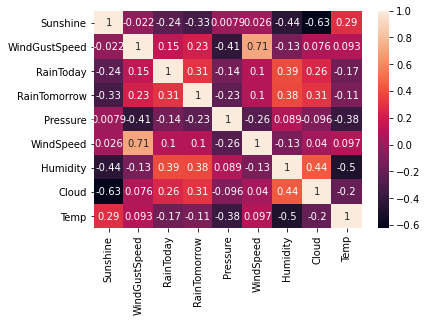

In [27]:
sn.heatmap(Corr_Matrix, annot=True)
plt.show()     # ***************************** Decisions to be taken: Need to merge Sunshine and Cloud somehow. Location needs to be discussed.

In [28]:
rain_data=rain_data.drop(columns=['Location'])

In [29]:
windgustspeed=np.array(rain_data['WindGustSpeed'])
windspeed=np.array(rain_data['WindSpeed'])

In [30]:
windspeedtotal=np.add(windgustspeed,windspeed)

In [31]:
rain_data=rain_data.drop(columns=['WindGustSpeed','WindSpeed'])
rain_data=rain_data.assign(WindVelocity=windspeedtotal)

In [32]:
sunshine=np.array(rain_data['Sunshine'])
cloud=np.array(rain_data['Cloud'])
brightness=np.multiply(sunshine,cloud)
rain_data=rain_data.drop(columns=['Sunshine','Cloud'])
rain_data=rain_data.assign(Brightness=brightness)

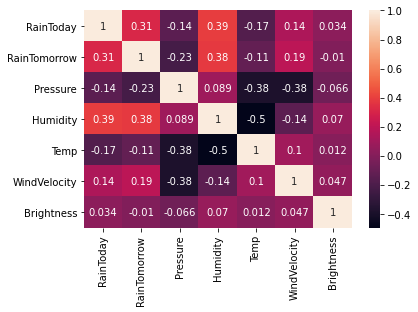

In [33]:
Corr_Matrix_regulated=rain_data.corr() 
sn.heatmap(Corr_Matrix_regulated, annot=True)
plt.show() #rank calculation. negative means indirectly proportional, positive means direct. Usually strong relations are merged together.

In [34]:
rain_data.to_csv('Rain_data_manipulated.csv') #storing this copy of manipulation.do not run this cell until absolutely sure